## Script Init

In [4]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
                                  
# Graphical set up

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

pd.set_option('display.max_row', 10)
pd.set_option('display.max_column', 10)
pd.options.mode.chained_assignment = None

sns.set()
sns.set_style("ticks")
ColorsPalette = sns.color_palette("tab10")


## Data importation

In [5]:
# Define a working directory

#from os import chdir, getcwd
#wd=getcwd()
#chdir(wd)

# Retrieve data from web (uncomment if needed) #

#urlretrieve('https://s3-eu-west-1.amazonaws.com/static.oc-static.com\
#/prod/courses/files/Parcours_data_scientist/Projet+-+Donn%C3%A9es+%C3%A9ducatives\
#/Projet+Python_Dataset_Edstats_csv.zip','Projet+Python_Dataset_Edstats_csv.zip')

# Unzip file in current folder (uncomment if needed) #

#unZip = ZipFile('Projet+Python_Dataset_Edstats_csv.zip', 'r')
#unZip.extractall()

In [6]:
# Read the data

df = pd.read_csv('data/EdStatsData.csv')

## 1. Datasets analysis

### 1. 1 Dataset description

In [7]:
# Dataset shape
print('Dataset number of row : ', df.shape[0], '\n')
print('Dataset number of colums : ', df.shape[1], '\n')


Dataset number of row :  886930 

Dataset number of colums :  70 

Head rows of the dataset :  



In [8]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1970,...,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,...,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,...,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,...,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,...,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,...,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,...,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,...,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,...,NaN,NaN,NaN,NaN,NaN


In [9]:
# Variables types
print('Data dtype counts :\n', df.dtypes.value_counts(), '\n')

# Select numeric columns

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

print('Numeric colums in the dataset are : \n')
print(numeric_cols, '\n')

# Select non numeric columns

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

print('Non numeric colums in the dataset are : \n')
print(non_numeric_cols)

Data dtype counts :
 float64    66
object      4
dtype: int64 

Numeric colums in the dataset are : 

['1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2020' '2025'
 '2030' '2035' '2040' '2045' '2050' '2055' '2060' '2065' '2070' '2075'
 '2080' '2085' '2090' '2095' '2100' 'Unnamed: 69'] 

Non numeric colums in the dataset are : 

['Country Name' 'Country Code' 'Indicator Name' 'Indicator Code']


### 1. 2 Missing values (NaN) analysis

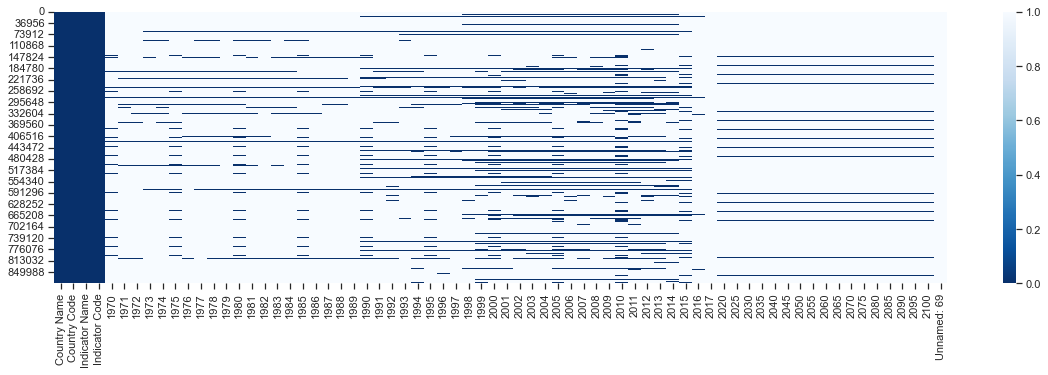

In [12]:
# NaN visualization over the whole dataset 

plt.figure(figsize = (20,5))
sns.heatmap(df.isna(), cmap = "Blues_r")
plt.savefig('visualisation/NaN_heatmap.png', bbox_inches="tight")

#### 1. 2. 1 Missing values per columns

In [13]:
# NaN count over columns (normalized)

print('NaN count over columns (normalized) : \n')

NaN_col = df.isna().sum()/df.shape[0] *100
print(NaN_col.describe())

NaN count over columns (normalized) : 

count     70.000000
mean      86.099852
std       21.989798
min        0.000000
25%       85.600696
50%       94.200670
75%       95.611181
max      100.000000
dtype: float64


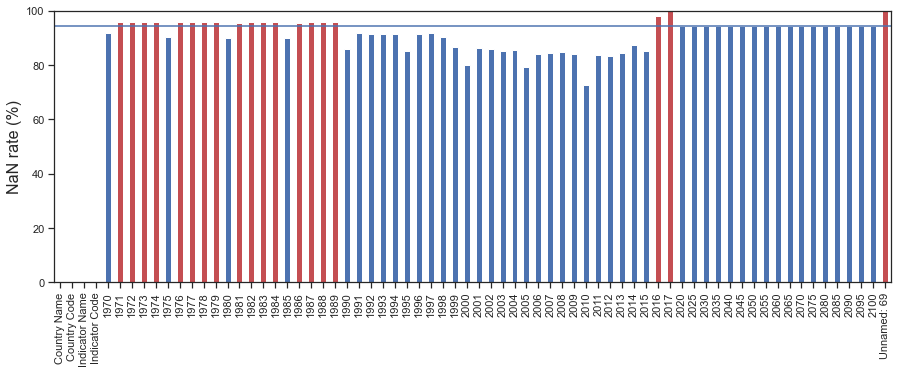

In [14]:
# NaN count visualization

col = (df.columns).astype('str')

colors = []
for value in NaN_col:
    if np.median(NaN_col) < value:
        colors.append('r')
    else:
        colors.append('b')
        
# Barchart with the NaN rate per column / red bar above the median NaN rate and blue bar are below the median
NaN_col.plot(kind = 'bar', x = col, y = NaN_col * 100, color = colors, figsize = (15,5)).set_ylim([0,100])
plt.axhline(np.median(NaN_col))
plt.ylabel('NaN rate (%)', fontsize = 16)
plt.savefig('visualisation/NaN_col_barchart.png', bbox_inches="tight")

In [15]:
# Drop all columns except target and 2000-2015 

df = df.drop(df.loc[:, '1970':'1989'], axis = 1)
df = df.drop(df.loc[:, '2016':], axis = 1)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1990,...,2011,2012,2013,2014,2015
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,...,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,...,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,...,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,...,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,71.995819,...,85.24514,86.101669,85.51194,85.320152,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,...,166679.00000,NaN,NaN,199464.000000,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,...,90.93070,NaN,NaN,90.428120,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,...,92.12456,NaN,NaN,93.188350,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,...,1.02828,NaN,NaN,1.063890,NaN


#### 1. 2. 2 Missing values per indicators

In [16]:
# Create a boolean mask with NaN : true or false

mask = df.isna()
mask = mask.astype(int)
mask['Indicator Code'] = df['Indicator Code']

# Aggregation of data by Indicator Code 

mask = mask.groupby(['Indicator Code']).sum()

# Calculate NaN's percentage per indictor

mask['NaN rate'] = mask.sum(axis = 1)/ mask.sum(axis = 1).max()
print(mask['NaN rate'].describe())

# Drop unnecessary columns

mask.drop(mask.loc[:,:"2015"], axis = 1, inplace = True)
mask = mask.sort_values(['NaN rate'], ascending = [True])
mask

count    3665.000000
mean        0.858941
std         0.222065
min         0.014145
25%         0.857120
50%         0.952003
75%         0.995391
max         1.000000
Name: NaN rate, dtype: float64


,NaN rate
Indicator Code,
SP.POP.TOTL,0.014145
SP.POP.GROW,0.015099
NY.GDP.MKTP.CD,0.088525
NY.GDP.PCAP.CD,0.089002
SP.POP.1564.TO.ZS,0.095677
...,...
SABER.TER.GOAL5,1.000000
SABER.TER.GOAL5.LVL1,1.000000
SABER.TER.GOAL6,1.000000


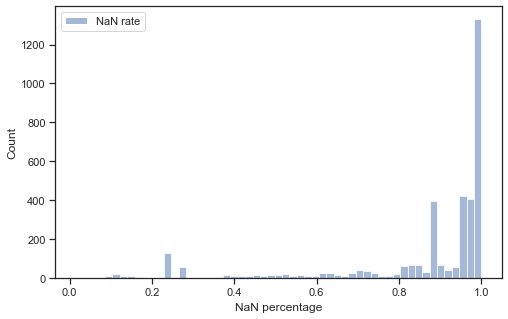

In [17]:
# Histogram of NaN rate for indicators from 1990 to 2015

plt.figure(figsize=(8, 5)) 
sns.histplot(mask)
plt.xlabel('NaN percentage')
plt.savefig('visualisation/Indicator_NaN_hist.png', bbox_inches='tight')

In [19]:
# Merge mask and EdStatsSeries informations to select properly the indicator

df_indic_info = pd.read_csv('data/EdStatsSeries.csv')
df_indic_info = df_indic_info.iloc[:,:5]
df_indic_info = df_indic_info.set_index('Series Code')

Indic_select = pd.merge(df_indic_info, mask.loc[:,'NaN rate'], right_index=True, left_index=True)

Indic_select.sample(n = 10)

# Export Relevant Parameters (uncomment if necessary)

#input_ = input('select file name: ')
#Indic_select.to_excel('{}.xlsx'.format(input_))

,Topic,Indicator Name,Short definition,Long definition,NaN rate
UIS.FOSEP.56.F800.M,Tertiary,Percentage of male students in tertiary educat...,NaN,Percentage of all male tertiary students who a...,0.842498
LO.PIAAC.LIT.4,Learning Outcomes,PIAAC: Adults by literacy proficiency level (%...,Percentage of adults scoring 326 to less than ...,Percentage of adults scoring 326 to less than ...,0.995232
NY.GNP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GNI per capita, PPP (current international $)",NaN,GNI per capita based on purchasing power parit...,0.162428
PRJ.MYS.2529.MF,Attainment,Projection: Mean years of schooling. Age 25-29...,NaN,Mean number of years spent in school by age gr...,0.946917
LO.EGRA.LSTN.0.DAGB.2GRD,Learning Outcomes,EGRA: Listening Comprehension - Share of stude...,Share of students scoring zero percent on the ...,Share of students scoring zero percent on the ...,0.999841
BAR.SEC.CMPT.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with secondar...,Percentage of population age 15+ with secondar...,0.885569
LO.TIMSS.SCI8.P95,Learning Outcomes,TIMSS: Distribution of 8th Grade Science Score...,The 95th percentile score is the score below w...,The 95th percentile score is the score below w...,0.968373
UIS.FEP.56.F140,Tertiary,Percentage of students enrolled in Education p...,NaN,Total number of female students in a given ter...,0.819135
HH.DHS.TR.12.Q2,Education Equality,DHS: Transition rate. Primary to Secondary. Qu...,Transition rate. Primary to Secondary. Quintil...,Transition rate. Primary to Secondary. Quintil...,0.986650
PRJ.ATT.4064.2.MF,Attainment,Projection: Percentage of the population age 4...,NaN,Share of the population of the stated age grou...,0.946917


In [20]:
# Indicator topic details
Indic_select['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

## 2. Data reduction

### 2. 1 Indicator selection

In [21]:
# Select data with choosen indicators

SelectedIndicator = ['NY.GDP.PCAP.CD',
'SP.SEC.TOTL.IN',
'SP.PRM.TOTL.IN',
'SP.TER.TOTL.IN',
'IT.NET.USER.P2',
'SE.SEC.ENRR',
'SE.TER.ENRR',]

df_select = df[df['Indicator Code'].isin(SelectedIndicator)]

print(df_select.shape)
df_select

(1694, 30)


,Country Name,Country Code,Indicator Name,Indicator Code,1990,...,2011,2012,2013,2014,2015
1245,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,2.003988e+03,...,7.005480e+03,7.571402e+03,7.715999e+03,NaN,NaN
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,5.309990e+01,...,7.069149e+01,7.171656e+01,7.027469e+01,7.073505e+01,NaN
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,1.117002e+01,...,2.427387e+01,2.577601e+01,2.733034e+01,2.817496e+01,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,0.000000e+00,...,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN
2320,Arab World,ARB,Population of the official age for primary edu...,SP.PRM.TOTL.IN,3.457066e+07,...,4.326099e+07,4.394758e+07,4.474423e+07,4.650962e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...
884604,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,4.996840e+00,...,5.823760e+00,5.868670e+00,5.871750e+00,NaN,8.433270e+00
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,0.000000e+00,...,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01
885585,Zimbabwe,ZWE,Population of the official age for primary edu...,SP.PRM.TOTL.IN,2.172348e+06,...,2.554192e+06,2.602762e+06,2.664843e+06,2.738602e+06,2.821597e+06
885588,Zimbabwe,ZWE,Population of the official age for secondary e...,SP.SEC.TOTL.IN,1.466415e+06,...,2.009047e+06,2.007007e+06,2.012733e+06,2.026425e+06,2.047619e+06


In [ ]:
(df_select.isna().sum()/df_select.shape[0]).describe()

count    30.000000
mean      0.170956
std       0.084875
min       0.000000
25%       0.150974
50%       0.164994
75%       0.229339
max       0.301653
dtype: float64

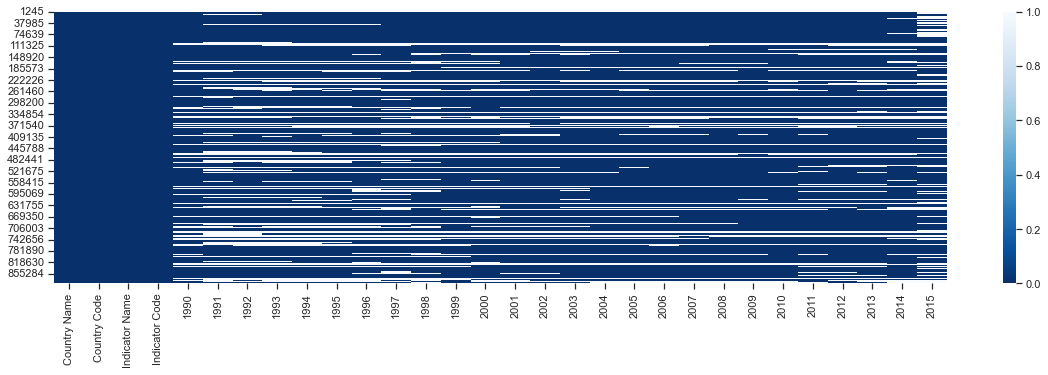

In [22]:
# Visualize NaN for selected indicator

plt.figure(figsize = (20,5))
sns.heatmap(df_select.isna(), cmap = 'Blues_r' )
plt.savefig('visualisation/SelectedIndicator_NaN_hist.png', bbox_inches='tight')

### 2.2 Creation of new indicator

In [23]:
# Create a mean columns for 1990 to 2015

df_select['mean'] = df_select.loc[:,'1990':'2015'].mean(axis = 1)

In [24]:
# Pivot table Indicator vs Country

df_avg = df_select.pivot(index = 'Country Code', columns = 'Indicator Code', values = 'mean')
df_avg

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.PRM.TOTL.IN,SP.SEC.TOTL.IN,SP.TER.TOTL.IN
Country Code,,,,,,,
ABW,39.634664,21493.076343,98.666956,29.139942,8.067423e+03,6.491654e+03,5.854462e+03
AFG,2.902425,404.954067,33.373235,3.518035,3.843255e+06,3.058693e+06,2.034465e+06
AGO,2.566056,1843.830632,17.520070,3.108208,2.496149e+06,2.606859e+06,1.628829e+06
ALB,19.519072,2249.915489,80.033149,26.067423,2.448801e+05,4.768641e+05,2.762635e+05
AND,46.125469,30338.545245,NaN,NaN,3.383222e+03,4.996778e+03,4.381111e+03
...,...,...,...,...,...,...,...
XKX,NaN,2760.874176,NaN,NaN,NaN,NaN,NaN
YEM,6.560333,792.971252,45.326966,9.392854,3.327056e+06,2.815155e+06,1.869058e+06
ZAF,12.784788,4679.682125,87.296877,15.444255,7.128829e+06,4.891535e+06,4.583801e+06


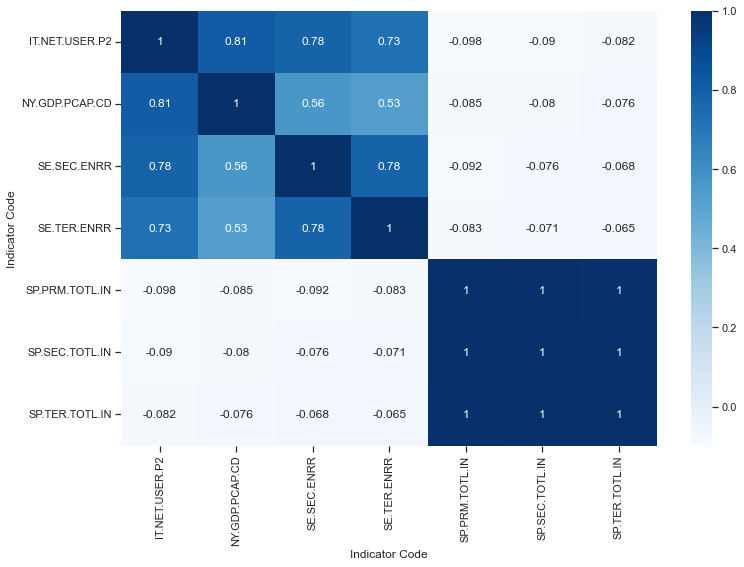

In [26]:
# Check correlation between choosen indicator

sns.heatmap(df_avg.corr(), cmap = 'Blues', annot=True)
plt.savefig('visualisation/Indic_correlation.png', bbox_inches='tight')

In [27]:
# Creation of new indicator by combinaison

# SE.SEC.ENRR and SE.TER.ENRR are percentage so I use the mean to combine them 
df_avg['SE.SEC+TER.ENRR'] = df_avg.loc[:, 'SE.SEC.ENRR':'SE.TER.ENRR'].mean(axis = 1)

# SP.PRM.TOTL.IN, SP.SEC.TOTL.IN and SP.TER.TOTL.IN are population count so I sum them to have the new indicator
df_avg['SP.PRM+SEC+TER.TOTL.IN'] = df_avg.loc[:, 'SP.PRM.TOTL.IN':'SP.TER.TOTL.IN'].sum(axis = 1)

# Drop old indicator
df_avg.drop(df_avg.loc[:,'SE.SEC.ENRR':'SP.TER.TOTL.IN'], axis = 1, inplace = True)
df_avg

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.SEC+TER.ENRR,SP.PRM+SEC+TER.TOTL.IN
Country Code,,,,
ABW,39.634664,21493.076343,63.903449,2.041354e+04
AFG,2.902425,404.954067,18.445635,8.936412e+06
AGO,2.566056,1843.830632,10.314139,6.731836e+06
ALB,19.519072,2249.915489,53.050286,9.980077e+05
AND,46.125469,30338.545245,NaN,1.276111e+04
...,...,...,...,...
XKX,NaN,2760.874176,NaN,0.000000e+00
YEM,6.560333,792.971252,27.359910,8.011269e+06
ZAF,12.784788,4679.682125,51.370566,1.660417e+07


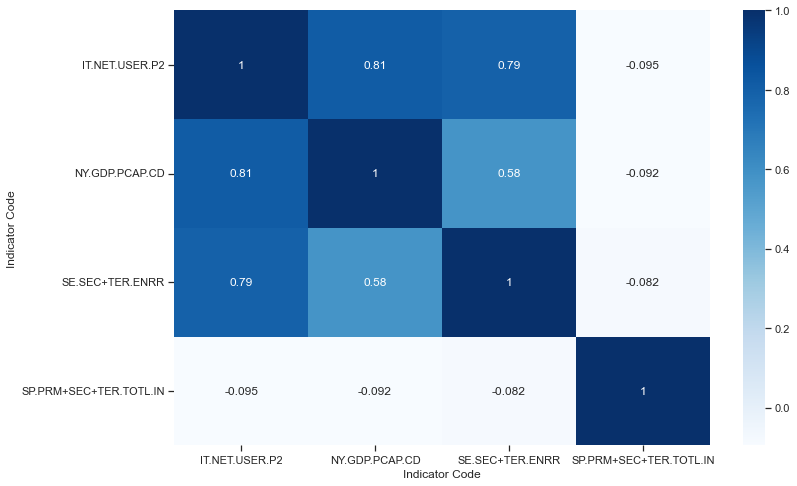

In [29]:
# Check correlation for new variables

sns.heatmap(df_avg.corr(), cmap = 'Blues', annot=True)
plt.savefig('visualisation/Indic_new_correlation.png', bbox_inches='tight')

## 3. Data analysis and scoring

### 3. 1. Analyse by geographical area

In [30]:
# Read the EdStatsCountry dataset to link country to geographical area
df_country = pd.read_csv('data/EdStatsCountry.csv')
df_country = df_country.loc[:,['Country Code', 'Short Name', 'Region']]
df_country = df_country.set_index('Country Code')

# Merge each country to its region
df_region = pd.merge(df_country, df_avg, right_index=True, left_index=True)
df_region.dropna(axis = 0)

# Calculate the average for my selected indicator per region
df_region_mean = df_region.groupby(['Region']).mean()
df_region_mean

,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.SEC+TER.ENRR,SP.PRM+SEC+TER.TOTL.IN
Region,,,,
East Asia & Pacific,17.889029,10417.400553,52.125977,1.603290e+07
Europe & Central Asia,33.621935,23169.099537,70.950072,3.510277e+06
Latin America & Caribbean,19.628150,8159.177056,55.770575,4.279498e+06
Middle East & North Africa,19.744892,10659.608485,49.743064,5.733958e+06
North America,51.510901,44483.831433,77.765535,2.500733e+07
South Asia,6.121019,1216.551612,30.201314,6.408106e+07
Sub-Saharan Africa,4.792390,1465.841985,20.025111,6.020110e+06


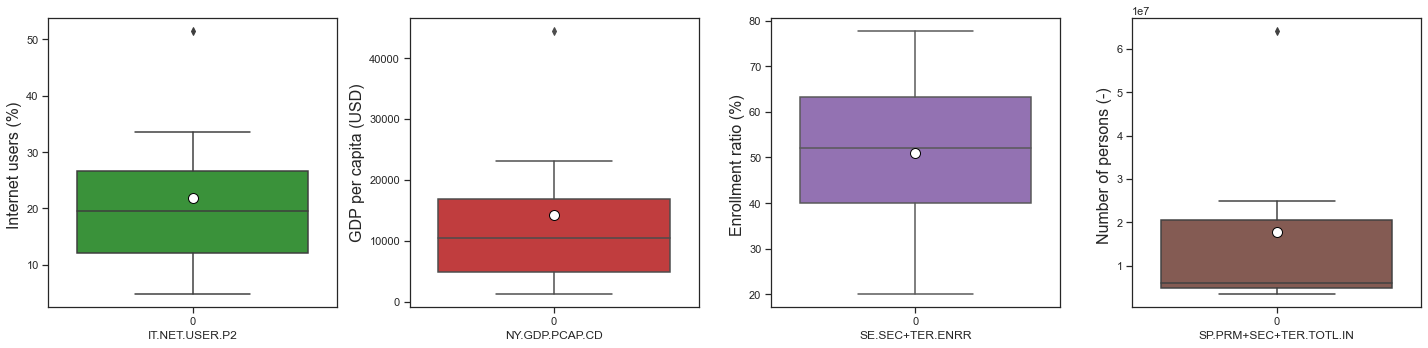

In [31]:
# Boxplot for each new indicator using the region calculated mean
plt.figure(figsize = (20, 5))

y_labls_1 = ['Internet users (%) ', 'GDP per capita (USD)', 'Enrollment ratio (%) ', 'Number of persons (-) ']

for j in range(len(df_region_mean.columns)):
    plt.subplot(1,len(df_region_mean.columns), j+1)
    sns.boxplot(data = df_region_mean.iloc[:,j], color = ColorsPalette[j+2],
                    showfliers = True, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
    plt.xlabel(df_region_mean.columns[j])
    plt.ylabel(y_labls_1[j], fontsize=16)
    plt.tight_layout() 



In [32]:
# Creation of the new indicator for each selected years

# Keep unchanged indicator
df_indic = df_select[(df_select['Indicator Code'] == 'IT.NET.USER.P2') | (df_select['Indicator Code'] == 'NY.GDP.PCAP.CD')]
df_indic = df_indic.set_index('Country Code')
df_indic = df_indic.iloc[:,2:]

# Create the new enrollement indicator
df_enroll = df_select[(df_select['Indicator Code'] == 'SE.SEC.ENRR') | (df_select['Indicator Code'] == 'SE.TER.ENRR')].groupby('Country Code').mean()
df_enroll['Indicator Code'] = 'SE.SEC+TER.ENRR'
df_enroll

# Create the new population count indicator
df_nb_person = df_select[(df_select['Indicator Code'] == 'SP.PRM.TOTL.IN') | (df_select['Indicator Code'] == 'SP.SEC.TOTL.IN') | (df_select['Indicator Code'] == 'SP.TER.TOTL.IN')].groupby('Country Code').sum(min_count = 1)
df_nb_person['Indicator Code'] = 'SP.PRM+SEC+TER.TOTL.INT'

# Concatenated all dataset together
df_indic = pd.concat([df_nb_person, df_enroll, df_indic])

# Set 0 = NaN
df_indic.replace(0, np.nan, inplace=True)

df_indic



,1990,1991,1992,1993,1994,...,2013,2014,2015,mean,Indicator Code
Country Code,,,,,,,,,,,
ABW,1.455200e+04,1.484800e+04,1.535300e+04,1.598700e+04,1.666800e+04,...,2.322800e+04,2.335200e+04,2.333900e+04,2.041354e+04,SP.PRM+SEC+TER.TOTL.INT
AFG,4.763924e+06,5.055657e+06,5.437003e+06,5.858924e+06,6.264040e+06,...,1.279018e+07,1.327525e+07,1.371102e+07,8.936412e+06,SP.PRM+SEC+TER.TOTL.INT
AGO,4.086125e+06,4.220624e+06,4.371438e+06,4.530625e+06,4.687912e+06,...,9.704350e+06,1.005761e+07,1.040968e+07,6.731836e+06,SP.PRM+SEC+TER.TOTL.INT
ALB,1.115512e+06,1.114976e+06,1.102755e+06,1.088335e+06,1.074821e+06,...,8.225980e+05,7.968310e+05,7.709320e+05,9.980077e+05,SP.PRM+SEC+TER.TOTL.INT
AND,1.257900e+04,1.272600e+04,1.299700e+04,1.312700e+04,1.309900e+04,...,NaN,NaN,NaN,1.276111e+04,SP.PRM+SEC+TER.TOTL.INT
...,...,...,...,...,...,...,...,...,...,...,...
YEM,NaN,NaN,NaN,NaN,NaN,...,2.000000e+01,2.255000e+01,2.408541e+01,6.560333e+00,IT.NET.USER.P2
ZMB,4.092580e+02,4.100719e+02,3.764574e+02,3.775723e+02,4.110390e+02,...,1.850793e+03,1.738088e+03,1.313890e+03,8.097563e+02,NY.GDP.PCAP.CD
ZMB,NaN,NaN,NaN,NaN,6.776105e-03,...,1.540000e+01,1.900000e+01,2.100000e+01,5.139873e+00,IT.NET.USER.P2


In [33]:
# Add the region variables
df_region = pd.merge(df_country, df_indic, right_index=True, left_index=True)

# Some Country Code are not country but small area, they do not belong to any region
df_region = df_region[df_region['Region'].notna()]

df_region

,Short Name,Region,1990,1991,1992,...,2013,2014,2015,mean,Indicator Code
Country Code,,,,,,,,,,,
ABW,Aruba,Latin America & Caribbean,1.455200e+04,1.484800e+04,1.535300e+04,...,2.322800e+04,2.335200e+04,2.333900e+04,2.041354e+04,SP.PRM+SEC+TER.TOTL.INT
ABW,Aruba,Latin America & Caribbean,NaN,NaN,NaN,...,1.619583e+01,1.640542e+01,1.527378e+01,6.390345e+01,SE.SEC+TER.ENRR
ABW,Aruba,Latin America & Caribbean,NaN,NaN,NaN,...,NaN,NaN,NaN,2.149308e+04,NY.GDP.PCAP.CD
ABW,Aruba,Latin America & Caribbean,NaN,NaN,NaN,...,7.890000e+01,8.378000e+01,8.866123e+01,3.963466e+01,IT.NET.USER.P2
AFG,Afghanistan,South Asia,4.763924e+06,5.055657e+06,5.437003e+06,...,1.279018e+07,1.327525e+07,1.371102e+07,8.936412e+06,SP.PRM+SEC+TER.TOTL.INT
...,...,...,...,...,...,...,...,...,...,...,...
ZMB,Zambia,Sub-Saharan Africa,NaN,NaN,NaN,...,1.540000e+01,1.900000e+01,2.100000e+01,5.139873e+00,IT.NET.USER.P2
ZWE,Zimbabwe,Sub-Saharan Africa,4.626608e+06,4.779927e+06,4.924448e+06,...,6.280419e+06,6.369725e+06,6.476836e+06,5.758212e+06,SP.PRM+SEC+TER.TOTL.INT
ZWE,Zimbabwe,Sub-Saharan Africa,2.503863e+01,2.587327e+01,2.370858e+01,...,2.672097e+01,NaN,8.433270e+00,2.425949e+01,SE.SEC+TER.ENRR


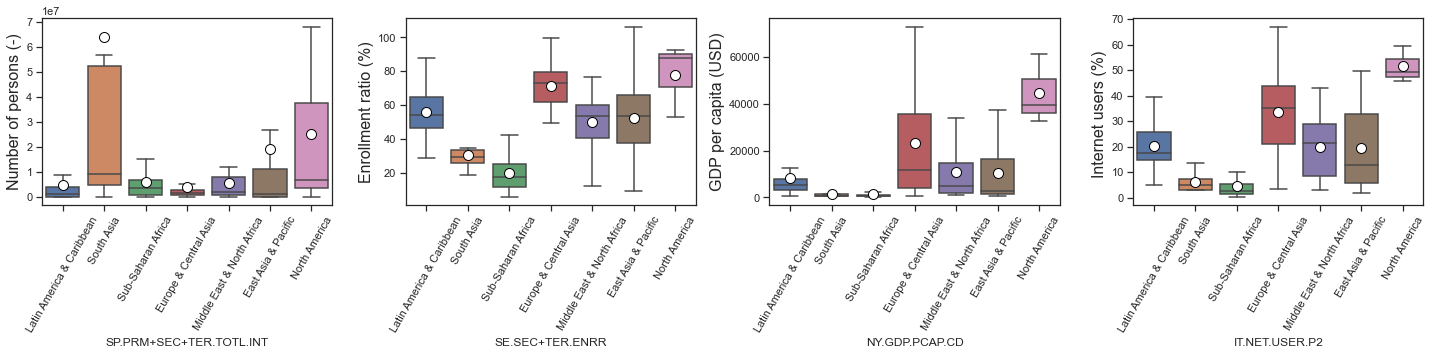

In [34]:
# Boxplot of the mean (over the year) per country grouped by indicator 

plt.figure(figsize = (20, 5))

y_labls = ['Number of persons (-)', 'Enrollment ratio (%)', 'GDP per capita (USD)', 'Internet users (%) ' ]

for j in range(len(df_region['Indicator Code'].unique())):
    plt.subplot(1,len(df_region['Indicator Code'].unique()), j+1)
    df_geo = df_region[df_region['Indicator Code'] == df_region['Indicator Code'].unique()[j]]
    sns.boxplot(data = df_geo, x = 'Region', y = 'mean',
                    showfliers = False, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
    plt.xlabel(df_region['Indicator Code'].unique()[j])
    plt.ylabel(y_labls[j], fontsize=16)
    plt.xticks(rotation = 60)

leg_labls = list(df_geo.columns)
plt.tight_layout(pad = .8)

plt.savefig('visualisation/boxplot_indic_area.png', bbox_inches='tight')

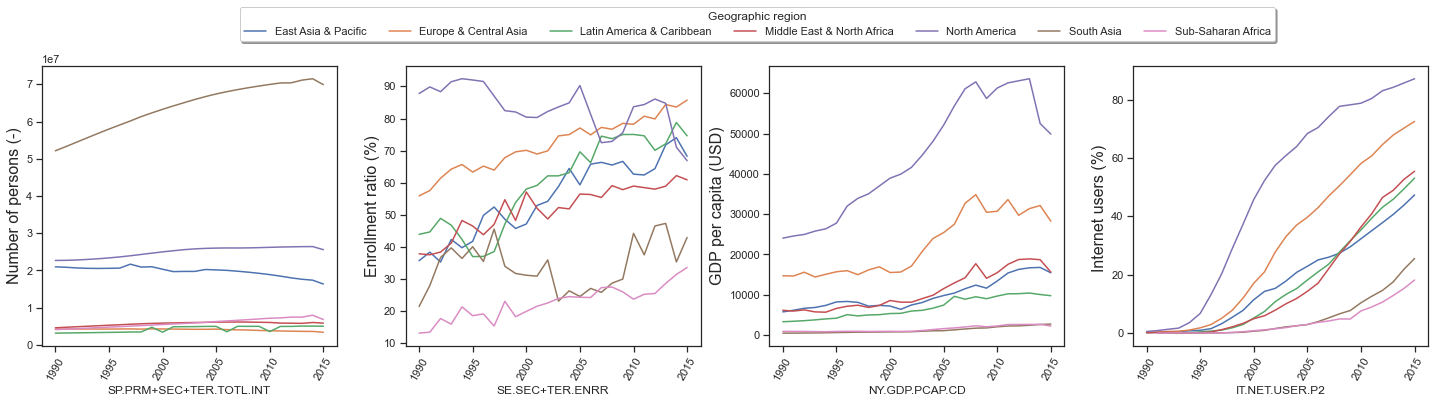

In [35]:
# Evolution of each indicator per year grouped by area
plt.figure(figsize = (20, 5))

y_labls = ['Number of persons (-)', 'Enrollment ratio (%)', 'GDP per capita (USD)', 'Internet users (%) ' ]

for j in range(len(df_region['Indicator Code'].unique())):
    plt.subplot(1,len(df_region['Indicator Code'].unique()), j+1)
    df_geo = df_region[df_region['Indicator Code'] == df_region['Indicator Code'].unique()[j]]
    df_geo = df_geo.groupby('Region').mean()
    df_geo = df_geo.T
    df_geo.drop(labels ='mean',  axis = 0, inplace = True)
    df_geo.interpolate(method='linear', axis=0, inplace = True)
    plt.plot(df_geo)
    plt.xlabel(df_region['Indicator Code'].unique()[j])
    plt.ylabel(y_labls[j], fontsize=16)
    plt.xticks(['1990', '1995', '2000', '2005', '2010', '2015'], rotation = 60)

leg_labls = list(df_geo.columns)
plt.tight_layout(pad = .8)
plt.legend(title='Geographic region', labels=leg_labls, fancybox=True, shadow=True, bbox_to_anchor = (.5,1.23), loc = 'upper right', ncol = 7)
plt.savefig('visualisation/evolution_indic_area.png', bbox_inches='tight')

### 3. 2. Scoring 

In [36]:
# In order to create a potentiel implementation score, I scaled all indicator (standardisation) as values range is very different
df_scale_tot = []
for j in range(len(df_region['Indicator Code'].unique())):
    df_scale = df_region[df_region['Indicator Code'] == df_region['Indicator Code'].unique()[j]].iloc[:,2:-2].transform(lambda x: (x - x.mean()) / x.std())
    df_scale['Indicator Code'] = df_region['Indicator Code'].unique()[j]
    df_scale_tot.append(df_scale)
df_scale_final = pd.concat(df_scale_tot)

# I'm considering a high enrollement ratio as a negative indicator
# df_scale_final[df_scale_final['Indicator Code'] == 'SE.SEC+TER.ENRR'].iloc[:,:-2] = df_scale_final[df_scale_final['Indicator Code'] == 'SE.SEC+TER.ENRR'].iloc[:,:-2].transform(lambda x: -x)

df_scale_final

,1990,1991,1992,1993,1994,...,2012,2013,2014,2015,Indicator Code
Country Code,,,,,,,,,,,
ABW,-0.247600,-0.249573,-0.251734,-0.253293,-0.254309,...,-0.268119,-0.269732,-0.274585,-0.262536,SP.PRM+SEC+TER.TOTL.INT
AFG,-0.114798,-0.108897,-0.100430,-0.090858,-0.081903,...,0.049062,0.063426,0.073459,0.099626,SP.PRM+SEC+TER.TOTL.INT
AGO,-0.133751,-0.132201,-0.130167,-0.127785,-0.125399,...,-0.081633,-0.017100,-0.011048,0.012276,SP.PRM+SEC+TER.TOTL.INT
ALB,-0.216815,-0.218871,-0.221388,-0.223481,-0.225107,...,-0.246763,-0.248872,-0.254270,-0.242755,SP.PRM+SEC+TER.TOTL.INT
AND,-0.247655,-0.249632,-0.251800,-0.253372,-0.254407,...,NaN,NaN,NaN,NaN,SP.PRM+SEC+TER.TOTL.INT
...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,IT.NET.USER.P2
YEM,NaN,NaN,NaN,NaN,NaN,...,-0.794139,-0.788802,-0.805936,-0.865403,IT.NET.USER.P2
ZAF,NaN,-0.725512,-0.653549,-0.555476,-0.383131,...,0.031549,0.125819,0.111283,0.109780,IT.NET.USER.P2


In [37]:
# The score is the sum of all indicator scaled values
df_score = df_scale_final.groupby('Country Code').sum(min_count=1)

# I'm calculating the mean of each year per country and then I use the logistic regression equation (ln(p/1-p) to calculated the probability of working implementation (1 = should work, 0 = should not work)
df_score['score_mean'] = df_score.iloc[:,1:].mean(axis = 1)
df_score['Rate'] = np.exp(df_score['score_mean']) / (1 + np.exp(df_score['score_mean']) )

# Sort the values to see Top 20 country

df_score = pd.merge(df_country, df_score, left_index=True, right_index=True)
df_score = df_score.set_index('Short Name')
df_score = df_score.sort_values(by='Rate', ascending=False)
df_score.head(n=20)

,Region,1990,1991,1992,1993,...,2013,2014,2015,score_mean,Rate
Short Name,,,,,,,,,,,
India,South Asia,6.766601,6.833175,7.634644,7.816078,...,8.476248,8.766580,8.984308,7.829155,0.999602
China,East Asia & Pacific,8.701259,8.487077,8.318560,7.461260,...,7.298936,7.147721,7.108505,7.433072,0.999409
United States,North America,6.755697,6.482814,6.282332,6.969110,...,5.070385,5.021466,5.178844,6.549639,0.998571
Liechtenstein,Europe & Central Asia,4.070860,4.143900,4.200878,4.481574,...,7.909854,8.449179,8.773895,6.428932,0.998388
Monaco,Europe & Central Asia,7.360716,7.189390,7.347799,7.157480,...,1.651339,1.616284,1.561821,6.410730,0.998359
...,...,...,...,...,...,...,...,...,...,...,...
Canada,North America,3.929032,4.054384,3.907773,3.759201,...,4.462015,2.722956,2.554003,4.153082,0.984527
Germany,Europe & Central Asia,1.215843,2.591320,2.787455,2.784143,...,3.381159,3.410458,3.393164,4.070438,0.983217
Japan,East Asia & Pacific,2.456721,2.918388,2.921052,4.901435,...,3.431014,3.204939,2.477906,4.052105,0.982911


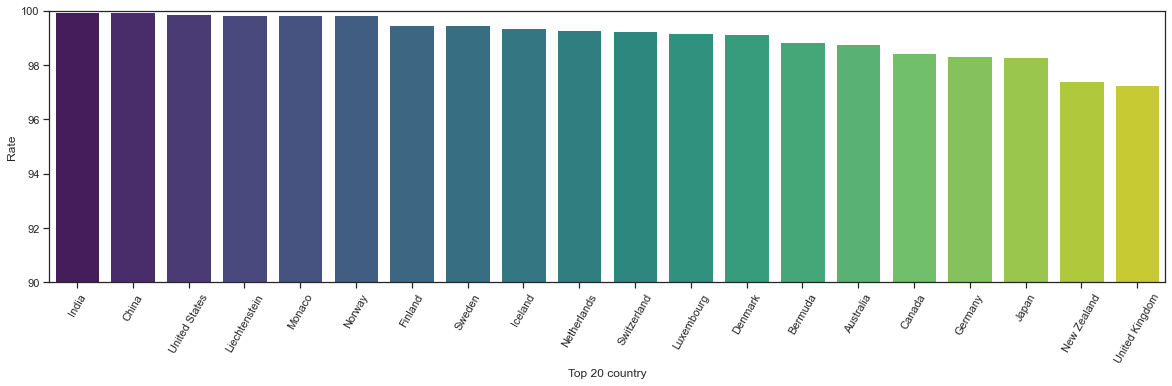

In [38]:
# Bar chart visualisation Top 20
df_bar = df_score.reset_index()
df_bar = df_bar.sort_values(by='Rate', ascending=False).head(20)
fig = plt.figure(figsize = (20, 5))

sns.barplot(data = df_bar ,
                 x = df_bar.loc[:,'Short Name'], 
                 y = df_bar.loc[:,'Rate'] * 100,  
                 palette='viridis')
plt.ylim(90, 100)
plt.xticks(rotation = 60)
plt.xlabel('Top 20 country')
plt.savefig('visualisation/Top20-score', bbox_inches='tight')

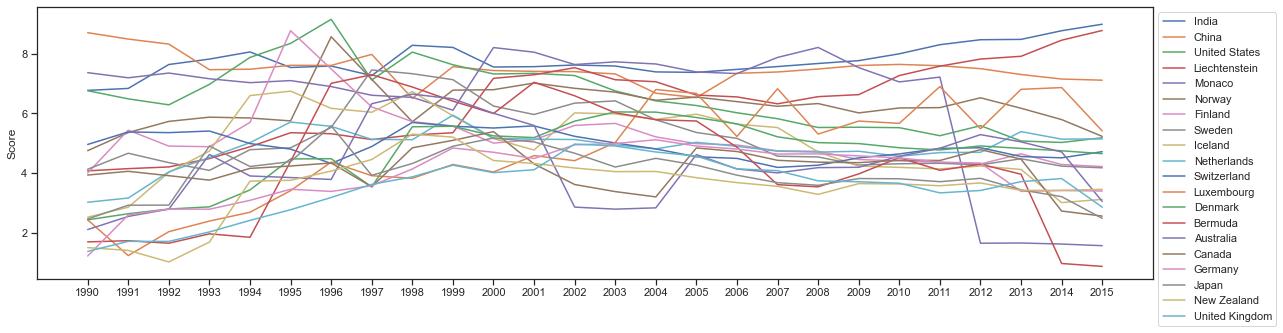

In [39]:
# Visualisation of the score evolution for top 20 rated country

df_plot = df_score.sort_values(by='Rate', ascending=False)
df_plot = df_plot.head(n=20).iloc[:,1:-2].T
leg_labls2 = df_plot.columns.values

plt.figure(figsize = (20, 5))
plt.plot(df_plot, label = leg_labls2)
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig('visualisation/score_evolution.png', bbox_inches='tight')

/var/folders/3g/tsbttmkd5pj3j74llkh5mlcm0000gn/T/ipykernel_37226/749982267.py:32: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])


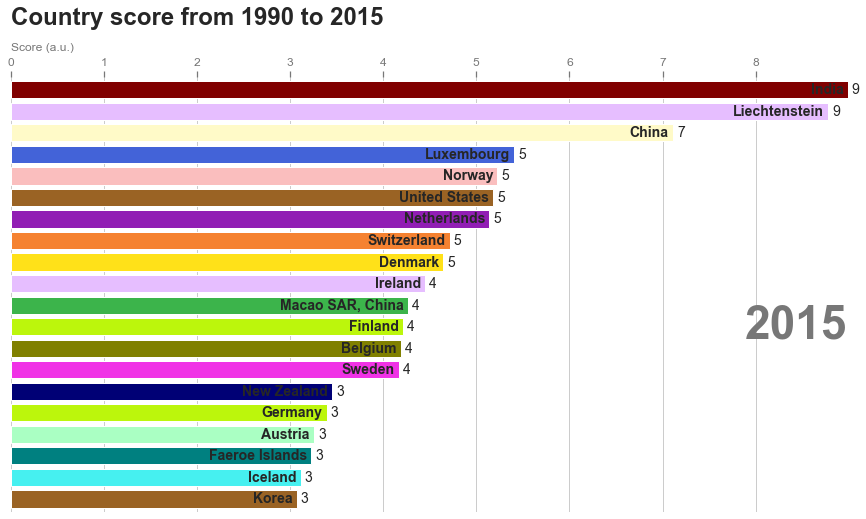

In [40]:
# Creation of an racing bar chart

Top20 = df_score.sort_values(by='score_mean', ascending=True).tail(40).reset_index()['Short Name']
df2 = df_score.interpolate(method='linear', axis=0)
df2=pd.melt(df2.iloc[:,1:-2].loc[Top20,:].reset_index(),id_vars=['Short Name'],var_name='year', value_name='score')
df2['year'] = df2['year'].astype(int)

df_color = (['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 
     '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
     '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
     '#000075', '#808080', '#bcf60c', '#fabebe'] * 2)
colors = dict(zip(
    df2['Short Name'].unique(), df_color))


fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(year):
    
    dff = df2[df2['year'].eq(year)].sort_values(by='score', ascending=True).tail(20)
    ax.clear()
    ax.barh(dff['Short Name'], dff['score'], color=[colors[x] for x in dff['Short Name']])
    dx = dff['score'].max() / 200
    for i, (value, name) in enumerate(zip(dff['score'], dff['Short Name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='center')
        ax.text(value+dx, i,     f'{value:,.00f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Score (a.u.)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Country score from 1990 to 2015',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)
    
draw_barchart(2015)

/var/folders/3g/tsbttmkd5pj3j74llkh5mlcm0000gn/T/ipykernel_37226/749982267.py:32: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])
/var/folders/3g/tsbttmkd5pj3j74llkh5mlcm0000gn/T/ipykernel_37226/749982267.py:32: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])
/var/folders/3g/tsbttmkd5pj3j74llkh5mlcm0000gn/T/ipykernel_37226/749982267.py:32: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])
/var/folders/3g/tsbttmkd5pj3j74llkh5mlcm0000gn/T/ipykernel_37226/749982267.py:32: MatplotlibDeprecationWarning: Suppor

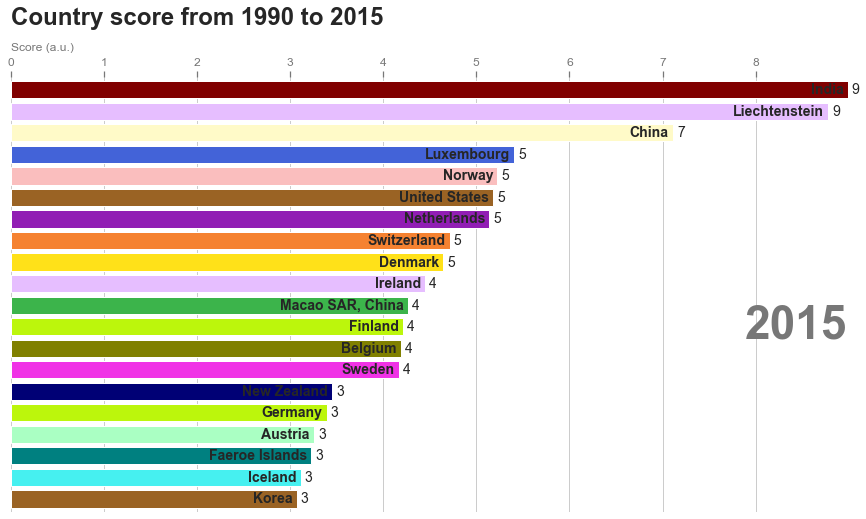

In [41]:
#Plot raceing bar chart

import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1990, 2016))
HTML(animator.to_jshtml()) 

/var/folders/3g/tsbttmkd5pj3j74llkh5mlcm0000gn/T/ipykernel_37226/749982267.py:32: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])
/var/folders/3g/tsbttmkd5pj3j74llkh5mlcm0000gn/T/ipykernel_37226/749982267.py:32: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])
/var/folders/3g/tsbttmkd5pj3j74llkh5mlcm0000gn/T/ipykernel_37226/749982267.py:32: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])
/var/folders/3g/tsbttmkd5pj3j74llkh5mlcm0000gn/T/ipykernel_37226/749982267.py:32: MatplotlibDeprecationWarning: Suppor

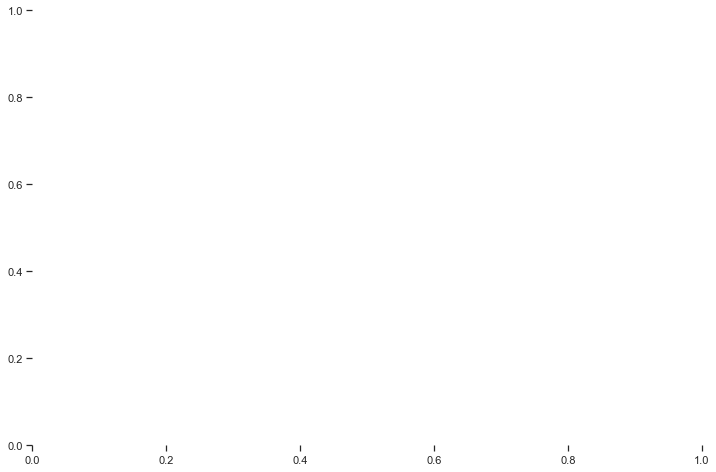

In [42]:
# Export the carchart as a .gif

writergif = animation.PillowWriter(fps=3)
animator.save('visualisation/race_barchart.gif', writer = writergif)

### Test map plot

In [44]:
df_country = pd.read_csv('data/EdStatsCountry.csv')
df_country = df_country.loc[:,['Short Name', '2-alpha code']]
df_country = df_country.set_index('Short Name')

# Merge each country to its region
df_alpha = pd.merge(df_country, df_score, right_index=True, left_index=True)
df_alpha

,2-alpha code,Region,1990,1991,1992,...,2013,2014,2015,score_mean,Rate
Short Name,,,,,,,,,,,
Aruba,AW,Latin America & Caribbean,-0.247600,-0.249573,-0.251734,...,-0.677609,-0.633999,-0.616862,0.655102,0.658159
Afghanistan,AF,South Asia,-1.308934,-1.028900,-0.100430,...,-2.114394,-3.062564,-2.307795,-1.668027,0.158687
Angola,AO,Sub-Saharan Africa,-1.898113,-1.967505,-1.989653,...,-3.544889,-1.729707,-3.733226,-2.364879,0.085890
Albania,AL,Europe & Central Asia,-0.299071,-0.402220,-0.752752,...,0.280249,0.230230,0.178020,-0.945726,0.279745
Andorra,AD,Europe & Central Asia,0.936588,0.968728,0.940737,...,2.745492,2.786056,2.657333,1.718697,0.847961
...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,Europe & Central Asia,NaN,NaN,NaN,...,-0.524045,-0.511153,-0.515455,-0.518990,0.373088
Yemen,YE,Middle East & North Africa,-0.668506,-0.664503,-2.021599,...,-1.929389,-1.411048,-1.536380,-1.923247,0.127500
South Africa,ZA,Sub-Saharan Africa,-0.092552,-0.827494,-1.864835,...,-1.614377,-0.329906,-0.236596,-0.033755,0.491562


In [45]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http://localhost:8888/lab/tree/Documents/P2_analyse_donnees_educatifs/P2_01_notebook.ipynb")

def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        temp = [country, loc.latitude, loc.longitude]
        return temp
    except:
        # Return missing value
        temp = [country, np.nan, np.nan]
        return temp

In [46]:
df_loc = []
for country in df_alpha.sort_values(by='Rate', ascending=True).tail(50).loc[:,'2-alpha code']:
    df_loc.append(geolocate(country))

df_loc = pd.DataFrame(df_loc, columns = ['2-alpha code',  'latitude', 'longitude'])

In [47]:
df_loc = pd.merge(df_loc.set_index('2-alpha code'), df_alpha.reset_index().set_index('2-alpha code').loc[:,['Rate', 'Short Name']], right_index=True, left_index=True)
df_loc.dropna()

,latitude,longitude,Rate,Short Name
2-alpha code,,,,
AD,42.540717,1.573203,0.847961,Andorra
AE,24.000249,53.999483,0.890466,United Arab Emirates
AT,47.200000,13.200000,0.965552,Austria
AU,-24.776109,134.755000,0.987657,Australia
BE,50.640281,4.666715,0.968828,Belgium
...,...,...,...,...
SM,43.945862,12.458306,0.949786,San Marino
US,39.783730,-100.445882,0.998571,United States
NaN,46.314475,11.048029,0.921288,Channel Islands


In [48]:
df_loc.reset_index()
df_loc.dropna(inplace=True)

In [49]:
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster

#empty map
world_map= folium.Map(tiles="cartodbpositron")

marker_cluster = MarkerCluster().add_to(world_map)#for each coordinate, create circlemarker of user percent
for i in range(len(df_loc)):
        lat = df_loc.iloc[i]['latitude']
        long = df_loc.iloc[i]['longitude']
        radius=5
        popup_text = """Country : {}<br>
                    Score : {}<br>"""
        popup_text = popup_text.format(df_loc.iloc[i].loc['Short Name'],
                                   round(df_loc.iloc[i].loc['Rate']*100)
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)#show the map
world_map